In [1]:
from LIPA2.ilaplace import *
from LIPA2.qp_solver import *

from utils import *
from utils.interpolate_1D import *


import numpy as np
norm=np.linalg.norm

syms_def(locals(),' c0, c1 ,c0,c1,c2,c3,c4,b1, b2, b3, b4, g, a1, a2, a3, a4, g1')

tic();

import dill
dill.settings['recurse'] = True

fname='ilapi0.ipynb.picle'
if 0:
    #[p,d,q]=sym_reduce([g],[( [b1,b2,b3,b4] ,g  )]);
    [p,d,q]=sym_reduce([c0,c1,c2,c3],[( [b1,b2,b3,b4] ,g  )]);
    dill.dump([p,d,q],open(fname,'wb'))
else:
    [p,d,q]=dill.load(open(fname,'rb'))
    
#[p,d,q]=sym_reduce([c0 ,c1,c0,c1,c2,c3],[( [0,b1,b2,b3] ,g  )]);

toc('reduce:')
#jo=arg2jso(c1=1.1,c2=2.3,c3=1.11,c4=21,c0=10j,g=3.11,g1=2j,b1=2.1,b2=1.2,b3=1.1j,a4=2)
jo={
    
    c0:-2.5+250j,
    c1:-2.5-250.5j,
    c2:-1.5+255j,
    c3:-1.5-255j,
    c4:-1,
    
    g:-17.5+250j,
    #g:0,                
    b1:0,
    b2:-1j,
    b3:0,
    b4:1,
    }



tic();
nd=0
nnd=5
'''
[GF,exg]=ilaplace_functor(p,jo,nd)
[F,exf]=ilaplace_functor(q,jo)
'''

jetGF=ilaplace_jet(p,jo)
jetF=ilaplace_jet(q,jo)

GF=jetGF(range(nnd))
F=jetF(range(nnd))

toc('functors:')



reduce: 0.0524396 sec
functors: 1.47828 sec


1.4782846999999997

''

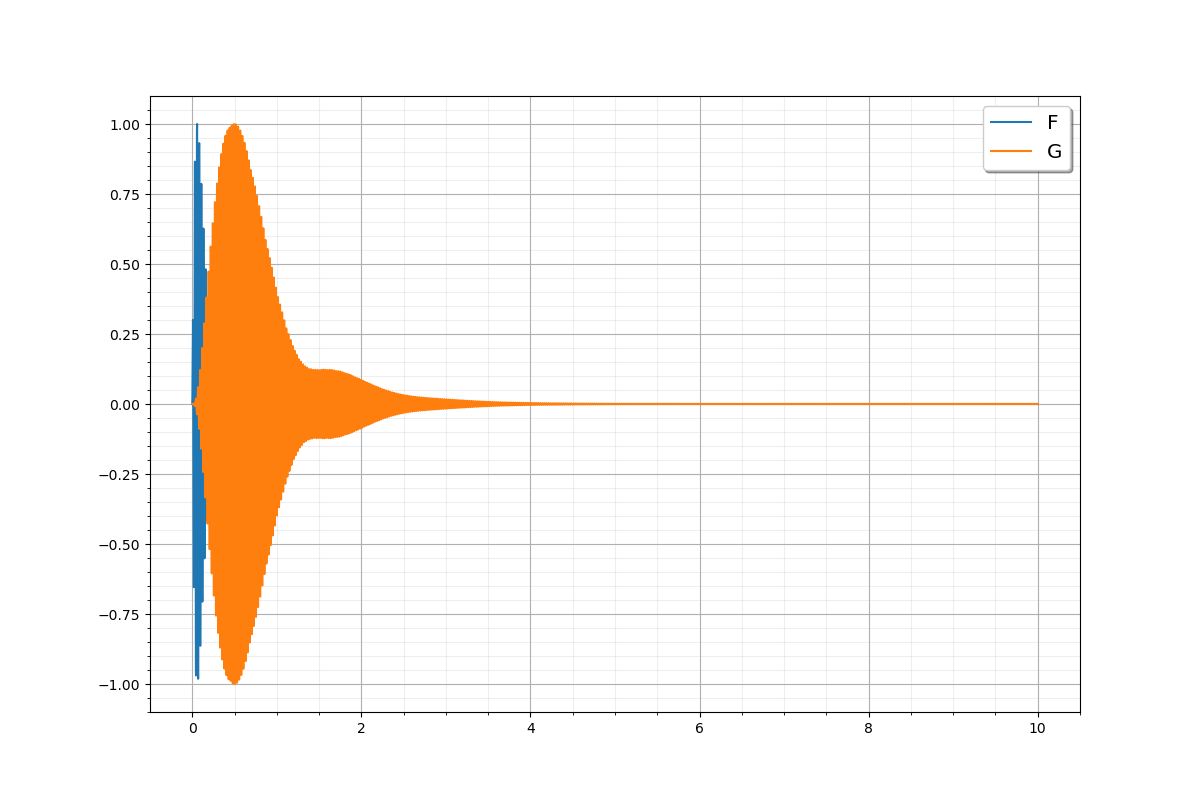

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib widget
#fig=plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)
ax.grid(True,which='major')
ax.minorticks_on()
ax.grid(True,which='minor',alpha=0.2)
tt=np.linspace(0,10,7200)
rn=lambda x: x.real/np.max(np.abs(x.real))
#plt.plot(tt,rn(F(tt)),tt,rn(GF(tt)))

nd=0
ax.plot(tt,rn(F(tt)[nd]),label='F')
ax.plot(tt,rn(GF(tt)[nd]),label='G');
'''
rn=lambda x: np.abs(x)/np.max(np.abs(x))
ax.plot(tt,np.abs(GF(tt)[0])/np.abs(GF(tt)[4]));
#ax.plot(tt,rn(GF(tt)[0]),label='0');
'''
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
''


Text(0.5, 1.0, 'error=0.0001303%\n')

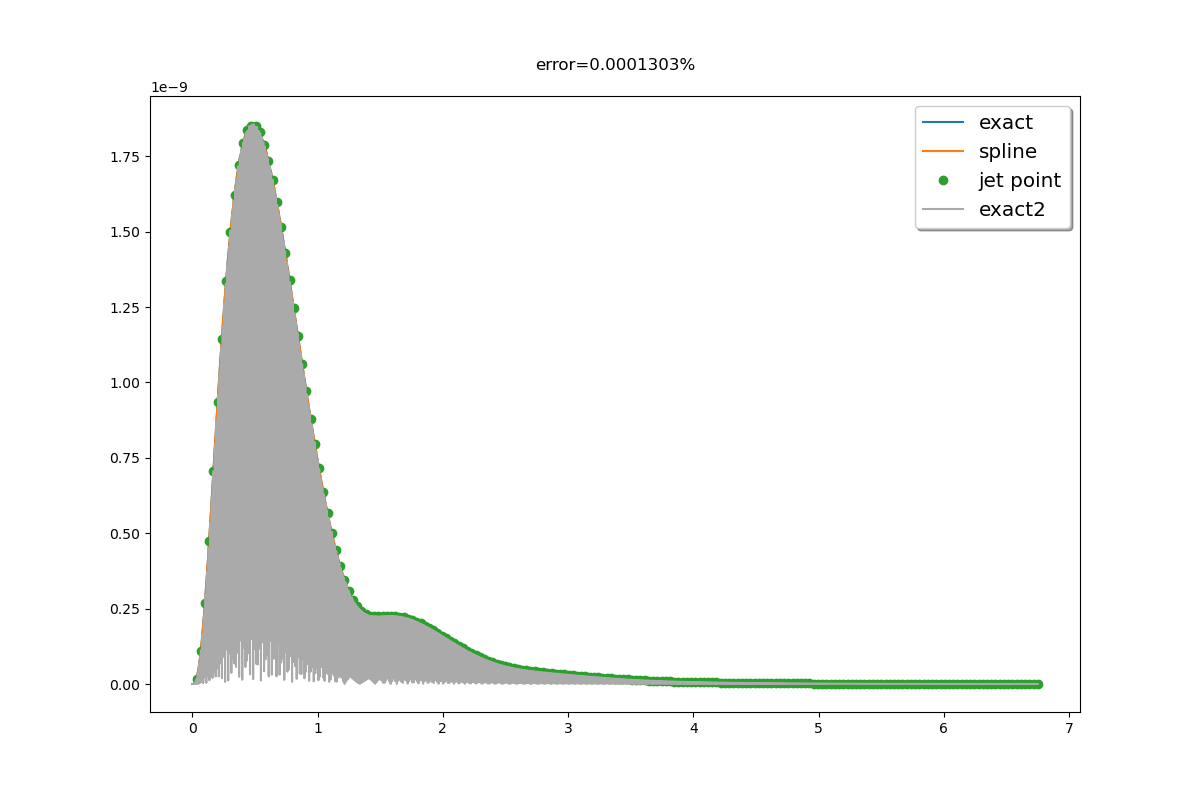

In [3]:
[DC,QP,G,FF]=make_lipa_data(d,q,jo);

LM=[6,8]
LM=[10,12]
LM=[16,18]
#LM=[12,14]
dt=0.0225*1.8
dt=0.0225*2.2
LM=[10,12]
dt=0.0225*1.5
#dt=0.0225*2.5
#dt=0.01

'''
print(QP.shape)
print(G.shape)
print(FF.shape)
'''
lqp=lipa_qp_number(DC,LM=LM,FF=FF,qp=QP,g=G,nd=8).reset(dt);
nd=0
nt=200
rn=lambda x :np.abs(x)
#rn=lambda x :x.real
tt=dt*np.arange(1,nt+1)
tm=np.max(tt)
ttx=np.linspace(0,tm,10000)
x=GF(tt)[nd]
ynn=lqp.dump(nt)
ynn=ynn.reshape(ynn.shape[0],-1).T
y=ynn[nd]
deg=ynn.shape[0]-1

jG=jet_spline(tt,ynn,deg=deg-1)

err=norm(x-y)/norm(x);
#fig2=plt.figure(figsize=(12,8))
fig2, ax2 = plt.subplots(figsize=(12,8))
ii=ttx>tt[0]
if 1:
    ax2.plot(ttx,rn(GF(ttx)[nd]),label='exact')
    ax2.plot(ttx[ii],rn(jG(ttx[ii])),label='spline')
    ax2.plot(tt,rn(y), marker='o',linewidth=0,label='jet point')
    ax2.plot(ttx,np.abs(GF(ttx)[nd].real),label='exact2',color='#AAAAAA')
else:
    ax2.plot(tt,rn(y), marker='o',linewidth=0,label='jet point')
legend = ax2.legend(loc='upper right', shadow=True, fontsize='x-large')
#print(x)    
#print(y[0])    
s=sprintf('error=%3.4g%%\n',100*err)

ax2.set_title(s)

In [59]:
xx=GF(tt);norm(xx-ynn[0:5])/norm(ynn[0:5])*100

0.017333141934617963

In [99]:
tt[0]

0.0495

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(tt,y.real, marker='o',linewidth=0,label='ss')
#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


In [55]:
s=jetGF.getex(2);s


c0**2*(b1 + b2/(c0 - g) + b3/(c0 - g)**2 + b4/(c0 - g)**3)*exp(c0*t)/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)) - c1**2*(b1 + b2/(c1 - g) + b3/(c1 - g)**2 + b4/(c1 - g)**3)*exp(c1*t)/((c0 - c1)*(c1 - c2)*(c1 - c3)*(c1 - g)) + c2**2*(b1 + b2/(c2 - g) + b3/(c2 - g)**2 + b4/(c2 - g)**3)*exp(c2*t)/((c0 - c2)*(c1 - c2)*(c2 - c3)*(c2 - g)) - c3**2*(b1 + b2/(c3 - g) + b3/(c3 - g)**2 + b4/(c3 - g)**3)*exp(c3*t)/((c0 - c3)*(c1 - c3)*(c2 - c3)*(c3 - g)) + g**2*(6*b1 + 6*b2/(c3 - g) + 6*b2/(c2 - g) + 6*b2/(c1 - g) + 6*b2/(c0 - g) + 6*b3/(c3 - g)**2 + 6*b3/((c2 - g)*(c3 - g)) + 6*b3/(c2 - g)**2 + 6*b3/((c1 - g)*(c3 - g)) + 6*b3/((c1 - g)*(c2 - g)) + 6*b3/(c1 - g)**2 + 6*b3/((c0 - g)*(c3 - g)) + 6*b3/((c0 - g)*(c2 - g)) + 6*b3/((c0 - g)*(c1 - g)) + 6*b3/(c0 - g)**2 + b4*t**3 + 6*b4/(c3 - g)**3 + 6*b4/((c2 - g)*(c3 - g)**2) + 6*b4/((c2 - g)**2*(c3 - g)) + 6*b4/(c2 - g)**3 + 6*b4/((c1 - g)*(c3 - g)**2) + 6*b4/((c1 - g)*(c2 - g)*(c3 - g)) + 6*b4/((c1 - g)*(c2 - g)**2) + 6*b4/((c1 - g)**2*(c3 - g)) + 6*b

In [ ]:
p[3][0][0]


In [62]:
expm

<bound method MatrixCalculusMethods.expm of <mpmath.ctx_mp.MPContext object at 0x0000026A775C9AC8>>

In [66]:
Matrix.diag([1,1,1,1],-1)

Matrix([
[1,  0],
[1,  0],
[1,  0],
[1,  0],
[0, -1]])